In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/insurance/insurance.csv


In [2]:
medical_rec = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [3]:
medical_rec.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# An overview of male and vs charges applied(segregated by smoking habit)

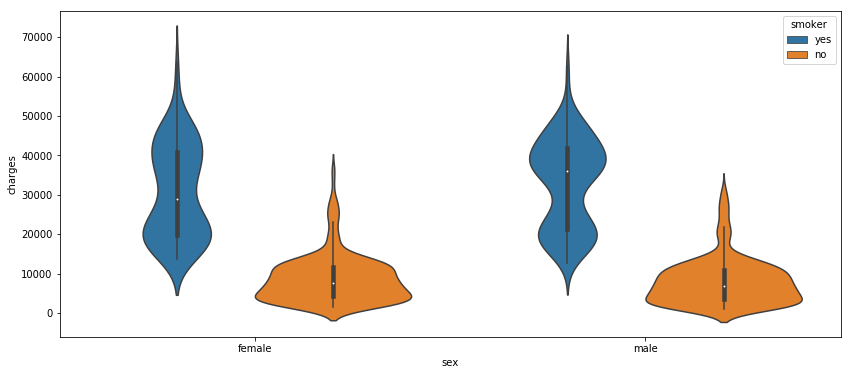

In [4]:
fig = plt.figure(figsize=(14,6))
sns.violinplot(x="sex", y="charges", data=medical_rec, hue="smoker")

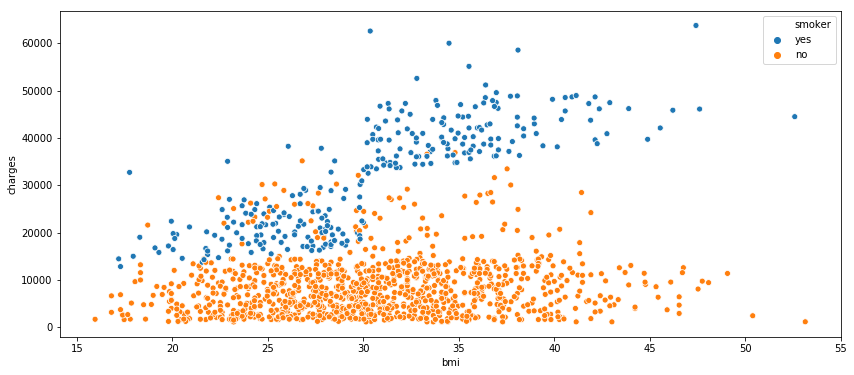

In [5]:
fig = plt.figure(figsize=(14,6))
sns.scatterplot(x="bmi", y="charges", data=medical_rec, hue="smoker")

# Encoding categorical data to numerical values so that algorithm can use it effectively

In [6]:
categorical_columns = ['sex','children', 'smoker', 'region']
medical_rec_encoded = pd.get_dummies(data = medical_rec, prefix = None, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
medical_rec_encoded.head(5)

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [7]:
medical_rec_encoded['charges'] = np.log(medical_rec_encoded['charges'])

In [8]:
medical_rec_encoded.head(5)

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(medical_rec_encoded.drop("charges", axis=1), medical_rec_encoded["charges"])

In [11]:
Lin = LinearRegression()

In [12]:
Lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
prediction = Lin.predict(X_test)

In [14]:
evaluation_metrics = pd.DataFrame({"prediction":prediction, "actual":y_test}).reset_index(drop=True)
evaluation_metrics.head(5)

,prediction,actual
0,9.612160,9.545515
1,9.175430,10.256568
2,9.544582,10.418464
3,8.453006,8.389299
4,7.987846,7.835112


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

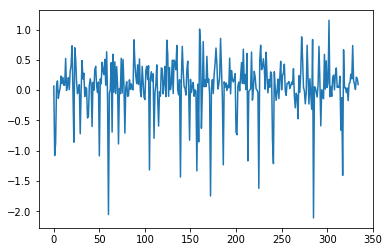

In [16]:
sns.lineplot(x=evaluation_metrics.index, y=evaluation_metrics["prediction"]-evaluation_metrics['actual'])

In [17]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, prediction)
MSE = metrics.mean_squared_error(y_test, prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, prediction))
print("MAE: {}".format(MAE))
print("MSE: {}".format(MSE))
print("RMSE: {}".format(RMSE))

MAE: 0.2954209332869481
MSE: 0.20236541519003645
RMSE: 0.44985043646754025
